# Analyze 2012-2016 Revenue Performance

In this challenge, I created a Python script for analyzing the financial records of PyBank.

This notebook will bring all the data sources together and format them for further analysis.


## Data Sources:
* revenue_2009_2016.csv : Processed data from the data-prep


Each dataset is composed of two columns: Date and Revenue.



### Task is to create a Python script that analyzes the records to calculate each of the following:

- The total number of months included in the dataset.

- The total amount of revenue gained over the entire period.

- The average change in revenue between months over the entire period.

- The greatest increase in revenue (date and amount) over the entire period.

- The greatest decrease in revenue (date and amount) over the entire period.


### Changes:

- 02-12-2018: Started the project

- 12-11-2018: Updated the project using Python Pandas and added visualization using matplotlib, Tableau, and Univariate Linear Regression Machine learning to predict future bank revenue.


---

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [2]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [3]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [4]:
# Directory Location and Filenames

dir = 'data/processed/'
file = 'revenue_2009_2016.csv'

In [5]:
# Load Data into csv

df = pd.read_csv(os.path.join(dir, file), parse_dates=['Date'], index_col='Date')
df[:5]

,Revenue
Date,
2009-01-01,943690.0
2009-02-01,1062565.0
2009-03-01,210079.0
2009-04-01,-735286.0
2009-05-01,842933.0


In [6]:
## Display - typeformat

pd.set_option('display.float_format', '{:,.0f}'.format)

In [7]:
df.dtypes

Revenue    float64
dtype: object

In [8]:
df.memory_usage(deep=True)

Index      688
Revenue    688
dtype: int64

## Exploratory Data Analysis (EDA)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,86,"650,527","680,460","-1,063,151","279,551","686,900","1,118,162","2,211,086"


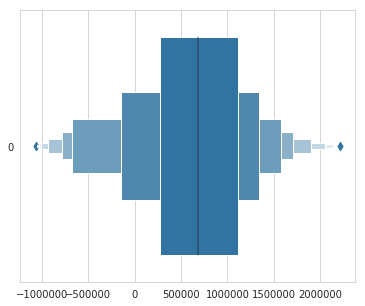

In [10]:
plt.figure(figsize=(6, 5))
ax = sns.boxenplot(data=df['Revenue'], orient='h')

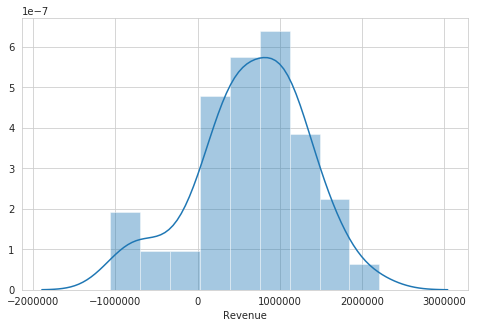

In [11]:
# Plot the Distribution for Revenue
plt.figure(figsize=(8, 5))
sns.distplot(df['Revenue'])

### Resampling and converting frequencies

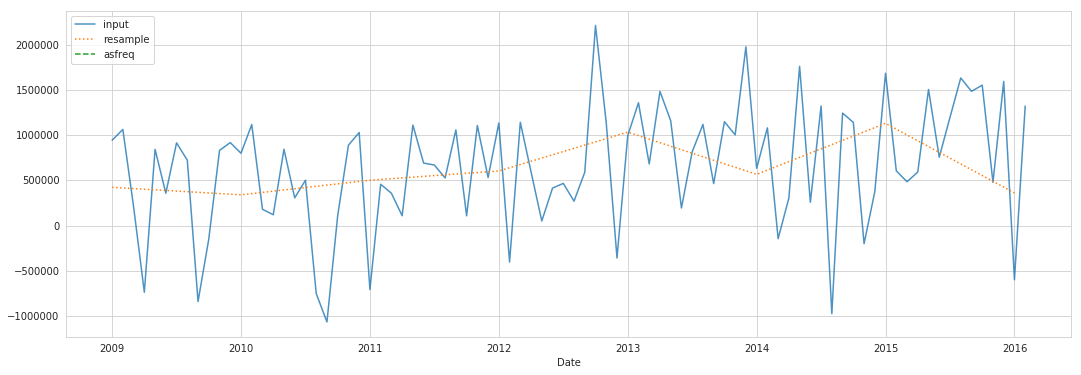

In [12]:
# Plot the Distribution for Revenue

df['Revenue'].plot(figsize=(18,6),alpha=0.8, style='-')
df['Revenue'].resample('BA').mean().plot(style=':')
df['Revenue'].asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

The first thing to notice is that there is seasonality: each January, there's a jump. Also, there seems to be a trend: it seems to go slightly up, then down, back up and then back down. In other words, it looks like there are trends and seasonal components to these time series.

---

### Identifying Trends in Time Series with Rolling Average Method

- When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as we're talking about yearly seasonality.

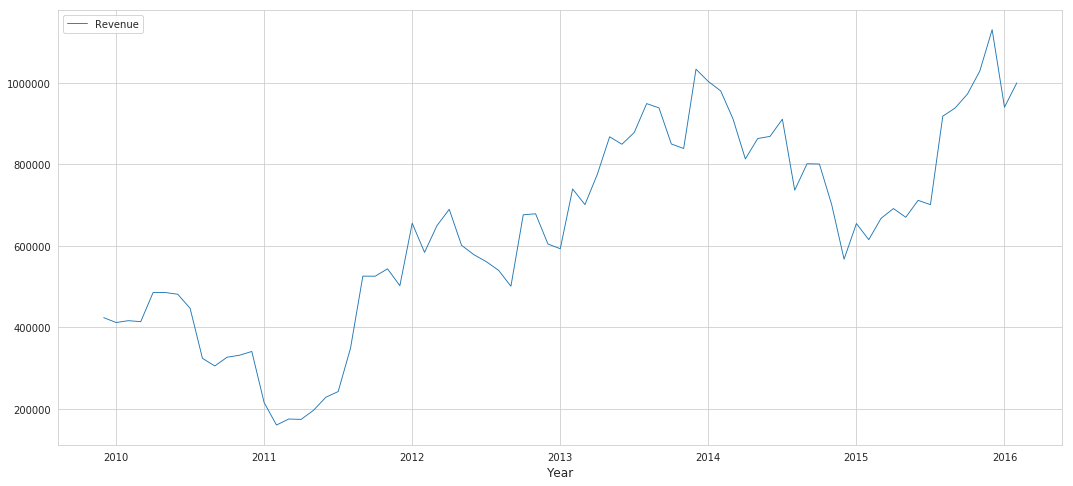

In [13]:
# Rolling Average

rvn = df[['Revenue']]
rvn.rolling(12).mean().plot(figsize=(18,8), linewidth=0.9, fontsize=10)
plt.xlabel('Year', fontsize=12);

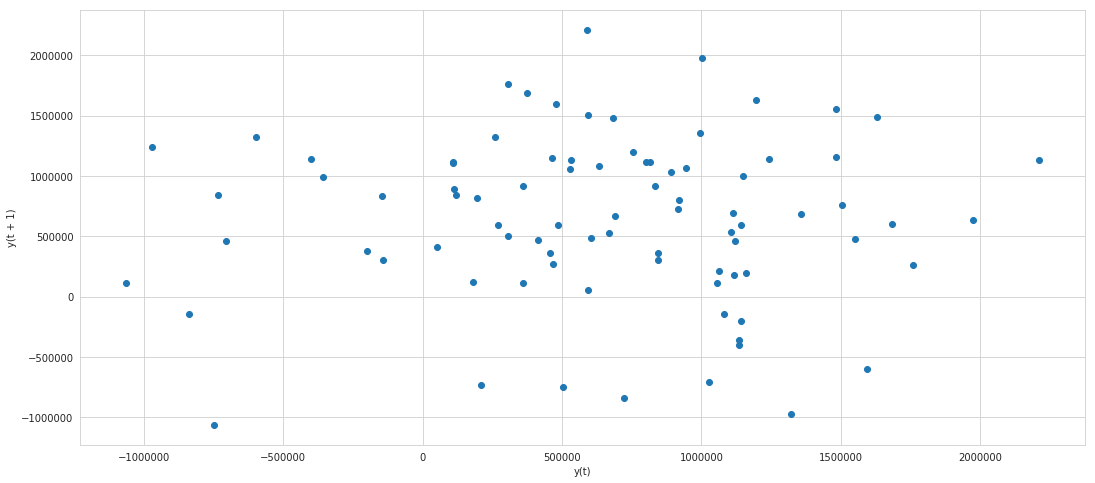

In [28]:
#Use Lagplot

from pandas.plotting import lag_plot
plt.figure(figsize=(18, 8))
lag_plot(df['Revenue'])

> 1. It looks like months' revenue are not correlated with one another. Residuals are **uncorrelated.**

> In an autocorrelation plot the lag is on the x-axis and the autocorrelation score is on the y-axis. The farther away the autocorrelation is from 0, the greater the influence that records that far away from each other exert on one another.

    Here is what an autocorrelation plot looks like when applied to the revenue data:

---

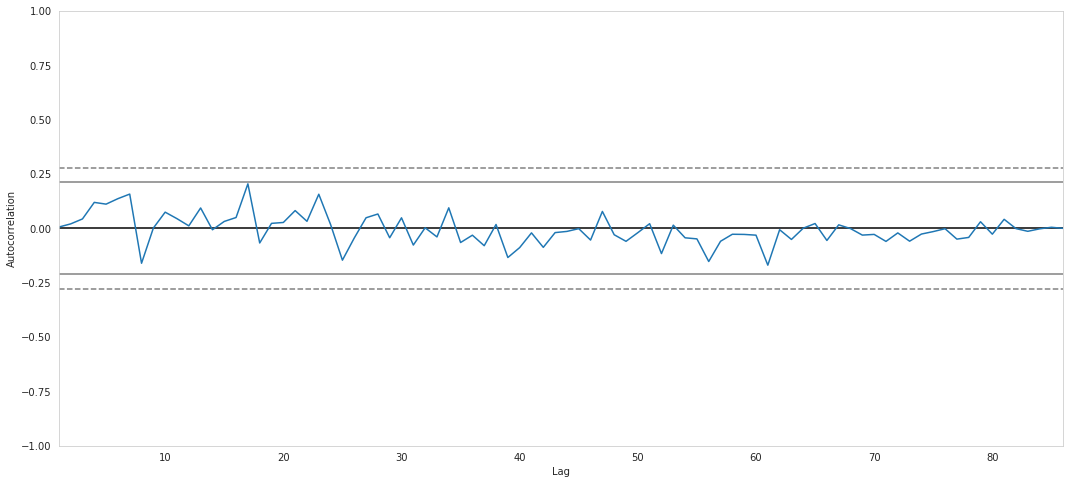

In [29]:
# Residual Plot
# Difference between the observed value and forecast value


# ACF Plot
# Allows us to see if we have used all of the information in the time-series for our model.
# Residuals should have a 0 mean or at least close to a 0 mean.

from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(18, 8))
autocorrelation_plot(df['Revenue'])

> 2. Residuals should have a 0 mean or at least close to a 0 mean.


Therefore, our model have satisfied both characteristics to our ETS and Arima model.

---

In [16]:
# Check for monthly periodic signal

dfmonth = pd.DataFrame(df.groupby([ df.index.month, df.index.year])['Revenue'].mean())
dfmonth.rename_axis(['month','year'], inplace=True)
dfmonth.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

In [17]:
# Get the Min/Max Revenue and the Month when

HRevenue = dfmonth.Revenue.max()
HLoss = dfmonth.Revenue.min()
dmax = max(dfmonth.idxmax())
dmin = min(dfmonth.idxmin())

print('On %s/%s was Highest monthly Revenue of $%.00f.' %(dmax[0], dmax[1], HRevenue ))
print('On %s/%s was Biggest monthly Loss of $%.00f.' %(dmin[0], dmin[1], HLoss ))

On 10/2012 was Highest monthly Revenue of $2211086.
On 9/2010 was Biggest monthly Loss of $-1063151.


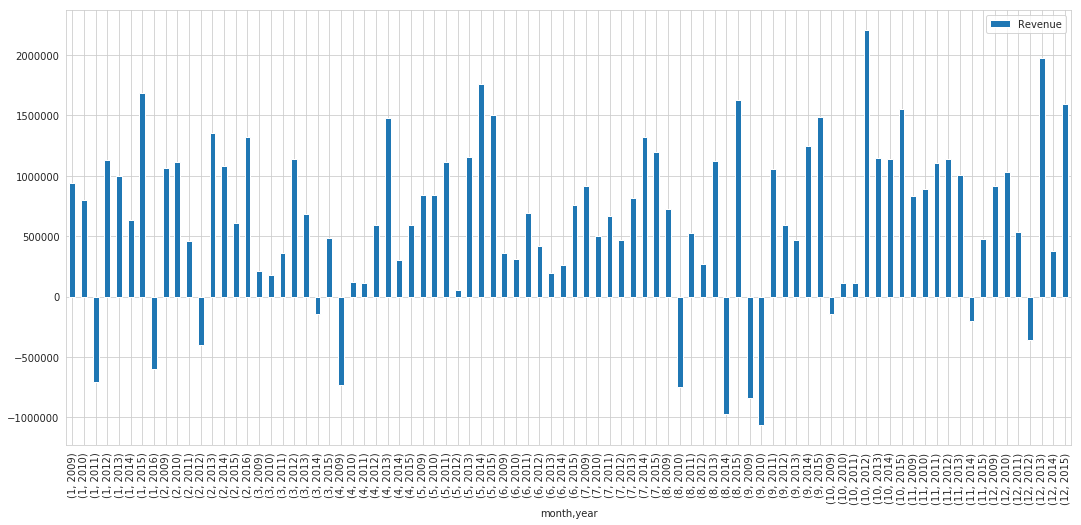

In [30]:
# We want to compare the Monthly Revenue Performance across the different years to detect seasonality and trends.

dfmonth.plot(kind='bar', figsize=(18,8))

In [19]:
# Check for quarter periodic signal

dfquarter = pd.DataFrame(df.groupby([ df.index.quarter, df.index.year])['Revenue'].sum())
dfquarter.rename_axis(['Quarter','Year'], inplace=True)
dfquarter.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

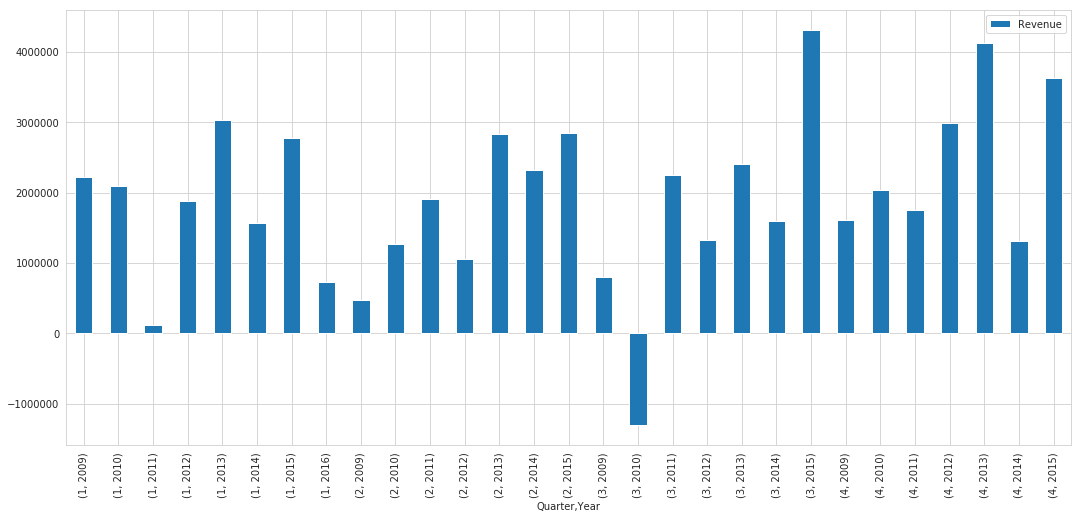

In [31]:
# We want to compare the Quarterly Revenue Performance across the different years to detect seasonality and trends.

dfquarter.plot(kind='bar', figsize=(18,8))

Here,we can clearly see the seasonality as we plot the graph by quarter across the years from 2009 to 2016 as higher revenues are on starts to pick up on the 3rd and 4th quarters.

---

In [21]:
# Check for quarter periodic signal

dfyear = pd.DataFrame(df.groupby(df.index.year)['Revenue'].sum())
dfyear.rename_axis('Year', inplace=True)
dfyear.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Year,
2009,5.08614e+06
2010,4.0908e+06
2011,6.02598e+06
2012,7.25363e+06
2013,1.23976e+07
2014,6.80641e+06
2015,1.35608e+07
2016,723960


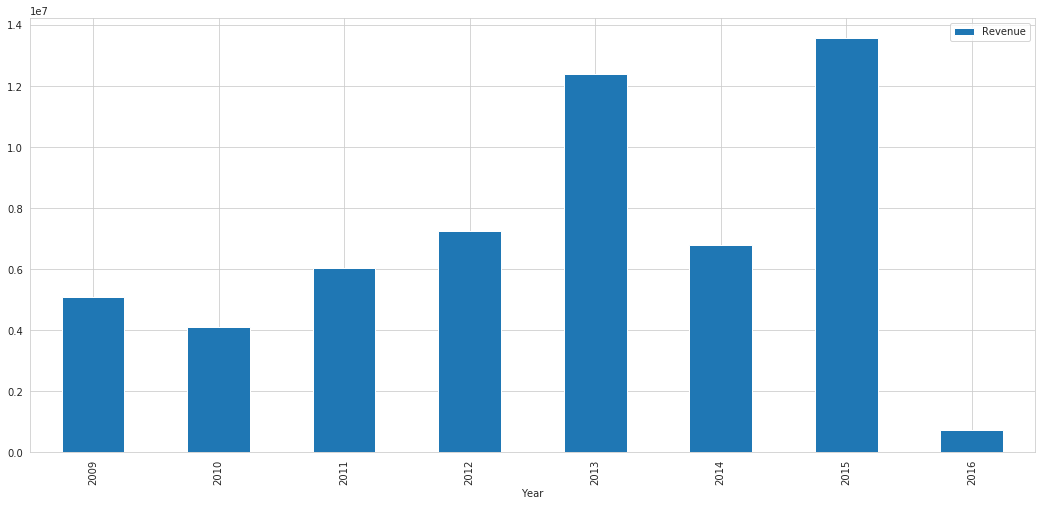

In [32]:
# We want to compare the Yearly Revenue Performance across the different years to detect seasonality and trends.

dfyear.plot(kind='bar', figsize=(18,8))

In [23]:
# Summarizing Stocks by Business quarter end
# Highligh - Max Revenue
# Red - Revenue Loss

dfq = pd.DataFrame(df.resample('BQ').Revenue.sum())
dfq.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Date,
2009-03-31 00:00:00,2.21633e+06
2009-06-30 00:00:00,466338
2009-09-30 00:00:00,800912
2009-12-31 00:00:00,1.60255e+06
2010-03-31 00:00:00,2.09836e+06
2010-06-30 00:00:00,1.27245e+06
2010-09-30 00:00:00,-1.30949e+06
2010-12-31 00:00:00,2.02948e+06
2011-03-31 00:00:00,110632


Text(3.2,0.5,'Revenue')

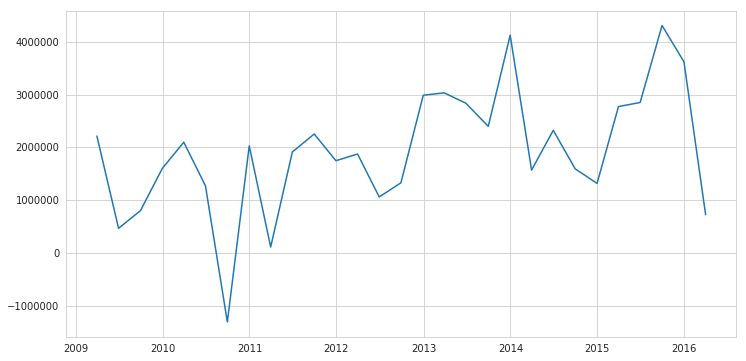

In [24]:
# Plot the Distribution for Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=dfq['Revenue'])
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)

Text(0,0.5,'Revenue')

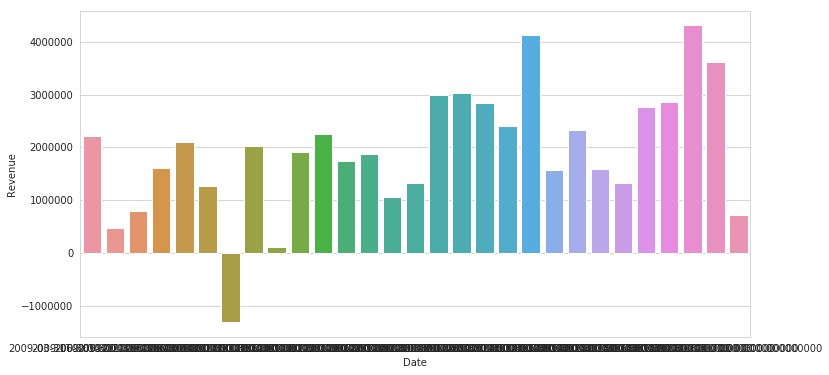

In [25]:
# Quarterly Revenue

plt.figure(figsize=(12, 6))
ax =sns.barplot(x=dfq.index, y=dfq.Revenue, data=dfq)
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)

In [26]:
# Summarizing Stocks by Business Year-End
# Highlight - Max Revenue
# Red - Revenue Loss

dfy = df.resample('BA').sum()

dfy.style.\
    applymap(color_negative_red).\
    apply(highlight_max)

,Revenue
Date,
2009-12-31 00:00:00,5.08614e+06
2010-12-31 00:00:00,4.0908e+06
2011-12-30 00:00:00,6.02598e+06
2012-12-31 00:00:00,7.25363e+06
2013-12-31 00:00:00,1.23976e+07
2014-12-31 00:00:00,6.80641e+06
2015-12-31 00:00:00,1.35608e+07
2016-12-30 00:00:00,723960


Text(0,0.5,'Revenue')

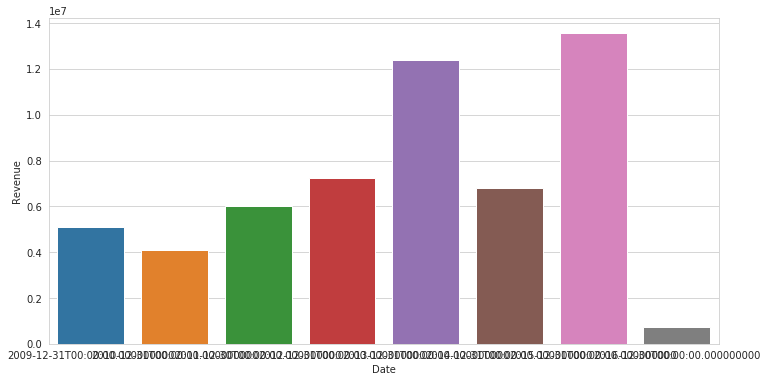

In [27]:
# Revenue Per year

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=dfy.index, y=dfy.Revenue, data=dfy)
ax.tick_params(labelsize=10)
ax.set_ylabel('Revenue', fontsize=10)